# NOTE: This notebook is not in final form. There is more to be done to this dataset.
# Caution:
* The original dataset, [downloaded from Kaggle](https://www.kaggle.com/datasets/gauthamp10/google-playstore-apps), is more than 675MB, due to resources constraint I'm droping the 12 columns below - considering the Objective of our analysis - and the 'NEW DATASET' is 350MB, even then don't exeucte the whole notbook if you don't have 16GB of RAM.
# About:
* The dataset is about goolge play store apps, having 2.3 million rows and 12 Columns.
# Objective:
* To deliver insights to understand customer demands better and thus help developers to popularize the product.

In [1]:
# The following columns are being dropped from original >675 MB dataset.

# cols=['Minimum Installs', 'Maximum Installs',
#       'Developer Id', 'Developer Website', 'Developer Email',
#       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice', 'Scraped Time'
#        'Released', 'Last Updated']

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

# Set options to be maximum for rows and columns
pd.options.display.max_rows=None
pd.options.display.max_columns=None

# Hide all warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Let pandas read the dataset
df=pd.read_csv('compressed_gpd.csv')

In [4]:
# Printing number of rows and columns in the dataset
print(f'There are {df.shape[0]:,} rows and {df.shape[1]:,} columns in the dataset')

There are 2,312,944 rows and 12 columns in the dataset


In [5]:
# Viewing the top 5 rows
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Free,Price,Currency,Size,Minimum Android,Content Rating
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,True,0.0,USD,10M,7.1 and up,Everyone
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",True,0.0,USD,2.9M,5.0 and up,Everyone
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,True,0.0,USD,3.7M,4.0.3 and up,Everyone
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,True,0.0,USD,1.8M,4.0.3 and up,Everyone
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,True,0.0,USD,6.2M,4.1 and up,Everyone


In [6]:
# Checking data, about the data i.e., What are the columns, what are their datatypes etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 12 columns):
 #   Column           Dtype  
---  ------           -----  
 0   App Name         object 
 1   App Id           object 
 2   Category         object 
 3   Rating           float64
 4   Rating Count     float64
 5   Installs         object 
 6   Free             bool   
 7   Price            float64
 8   Currency         object 
 9   Size             object 
 10  Minimum Android  object 
 11  Content Rating   object 
dtypes: bool(1), float64(3), object(8)
memory usage: 196.3+ MB


* Observation:
    * There are 2,312,944 rows and 12 columns
    * There are 3 numerical columns, 1 boolean column (i.e., data type would be either True or False), and 8 object columns
    * Data type of 2 object columns Install, and Size column needs to be changed to numeric.

In [7]:
# Checking the number of unique values for the mentioned 4 object columns
col=['Category', 'Free', 'Currency', 'Content Rating'] # Mentioning columns whose number of unique values are to be observed
df[col].nunique()

Category          48
Free               2
Currency          15
Content Rating     6
dtype: int64

In [8]:
# Viewing the unique values of 4 object columns
col=['Category', 'Free', 'Currency', 'Content Rating'] # Mentioning columns whose unique values are to be observed.
for i in col:
    print(df[i].unique())

['Adventure' 'Tools' 'Productivity' 'Communication' 'Social'
 'Libraries & Demo' 'Lifestyle' 'Personalization' 'Racing'
 'Maps & Navigation' 'Travel & Local' 'Food & Drink' 'Books & Reference'
 'Medical' 'Puzzle' 'Entertainment' 'Arcade' 'Auto & Vehicles'
 'Photography' 'Health & Fitness' 'Education' 'Shopping' 'Board'
 'Music & Audio' 'Sports' 'Beauty' 'Business' 'Educational' 'Finance'
 'News & Magazines' 'Casual' 'Art & Design' 'House & Home' 'Card' 'Events'
 'Trivia' 'Weather' 'Strategy' 'Word' 'Video Players & Editors' 'Action'
 'Simulation' 'Music' 'Dating' 'Role Playing' 'Casino' 'Comics'
 'Parenting']
[ True False]
['USD' 'XXX' 'CAD' 'EUR' 'INR' nan 'VND' 'GBP' 'BRL' 'KRW' 'TRY' 'RUB'
 'SGD' 'AUD' 'PKR' 'ZAR']
['Everyone' 'Teen' 'Mature 17+' 'Everyone 10+' 'Adults only 18+' 'Unrated']


* Observation: An anomly in Currency column needs to be fixed.

In [9]:
# Renaming column names
names=[]
for i in df.columns:
    names.append(i.replace(' ','_').lower()) # Replaces white space with underscore and lowering the case for each letter.
df.columns=names
df.columns

Index(['app_name', 'app_id', 'category', 'rating', 'rating_count', 'installs',
       'free', 'price', 'currency', 'size', 'minimum_android',
       'content_rating'],
      dtype='object')

## Handling Missing Values

In [10]:
# Checking total number of missing values in the data
print(f'Total number of missing number of values in dataset are {df.isnull().sum().sum():,}')

Total number of missing number of values in dataset are 52,739


In [11]:
# Checking number of missing values in each column, and sorting them.
df.isnull().sum().sort_values(ascending=False)

rating             22883
rating_count       22883
minimum_android     6530
size                 196
currency             135
installs             107
app_name               5
app_id                 0
category               0
free                   0
price                  0
content_rating         0
dtype: int64

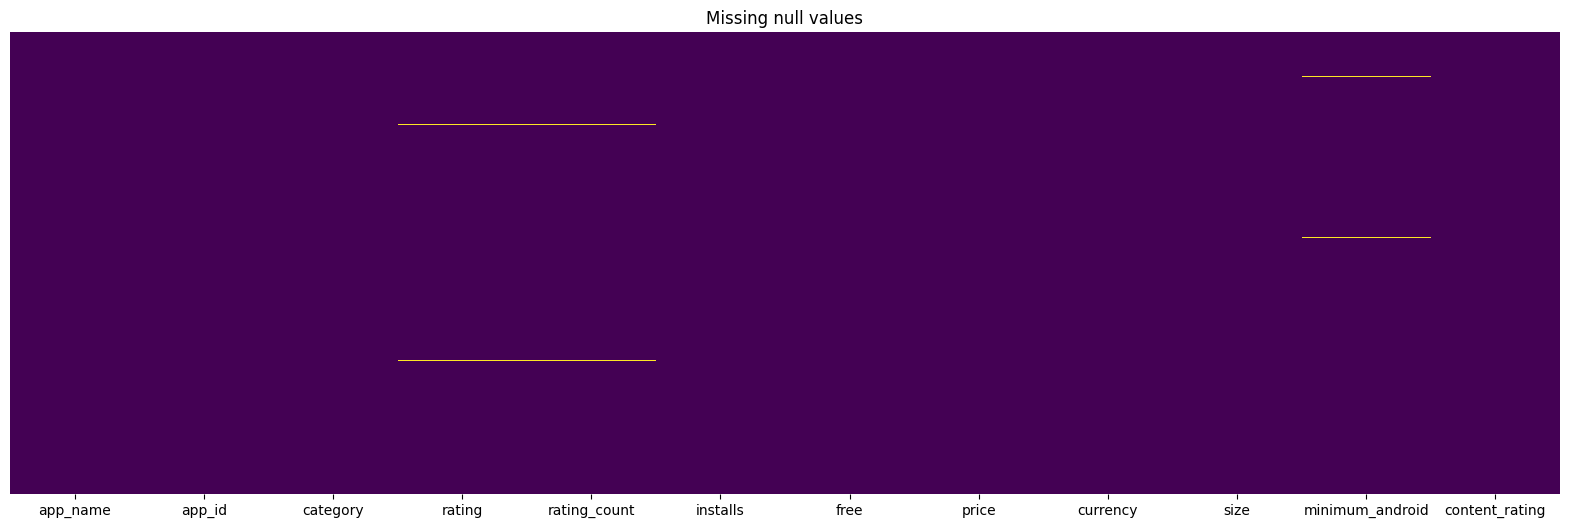

In [12]:
# Visualizing missing values in heatmap
plt.figure(figsize=(20,6)) # Setting the figure size
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis') # Code for plot and some minor tweaks like color etc.
plt.title('Missing null values') # Printing tilte of plot
plt.show() # Showing plot

In [13]:
# Viewing the percentage of missing values, and rounding them to 3 decimal digits.
# Only the following columns have missing values

missing_percentage=((df.isnull().sum()/df.shape[0])*100).round(3).sort_values(ascending=False)
missing_percentage=missing_percentage[missing_percentage != 0]
missing_percentage

rating             0.989
rating_count       0.989
minimum_android    0.282
size               0.008
currency           0.006
installs           0.005
dtype: float64

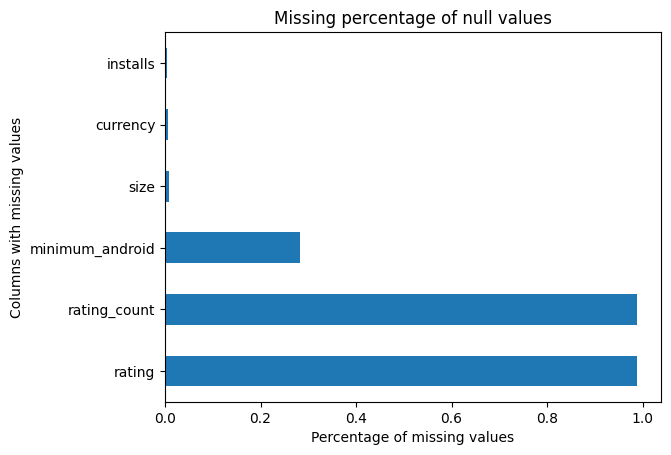

In [14]:
# Visualizing missing values with barplot
missing_percentage.plot(kind='barh')
plt.title('Missing percentage of null values')
plt.xlabel('Percentage of missing values')
plt.ylabel('Columns with missing values')
plt.show()

* Observation:
    * We can drop the small null values for the columns.
        * Size
        * Currency
        * Installs
    * Rating, Rating count are important column so it is good to fill the null values.
        * Rating
        * Rating count
        * Minimum Android

In [15]:
# Droping missing values of columns mentioned in 1st bullet of above observation
df.dropna(subset=['size', 'currency', 'installs'], inplace=True)
df.shape

(2312614, 12)

In [16]:
# Verifying weather the above code has been executed properly
df.isnull().sum()

app_name               5
app_id                 0
category               0
rating             22573
rating_count       22573
installs               0
free                   0
price                  0
currency               0
size                   0
minimum_android     6530
content_rating         0
dtype: int64

## Handling Duplicates

In [17]:
# Viewing the rows and columns of dataset.
df.shape

(2312614, 12)

In [18]:
# Checking for duplicates

# App names can be same, but app id's can't be same.
# So, if number of unique app_id's are equal to number of rows in dataset,
# we can safetly say that there are no duplicate apps.

df.app_id.nunique()

2312614

In [19]:
# Rechecking the app_id column for duplicates.
# If there is even one duplicate id, the outcome of the code will be True, otherwise False.

df.app_id.duplicated().any()

False

## Exploring the Numerical Columns

### Handling Installs, Size, and Currency column

#### Let's take care of installs Column

In [20]:
# Checking the unique values

df.installs.unique()

array(['10+', '5,000+', '50+', '100+', '1,000+', '500+', '50,000+',
       '10,000+', '1+', '500,000+', '100,000+', '5+', '10,000,000+',
       '1,000,000+', '5,000,000+', '0+', '100,000,000+', '50,000,000+',
       '1,000,000,000+', '500,000,000+', '5,000,000,000+',
       '10,000,000,000+'], dtype=object)

In [21]:
# Removing '+' sign, removing ',' and converting to integer type

df.installs=df.installs.str.strip('+').str.replace(',', '').astype('int')
df.installs.unique()

array([         10,        5000,          50,         100,        1000,
               500,       50000,       10000,           1,      500000,
            100000,           5,    10000000,     1000000,     5000000,
                 0,   100000000,    50000000,  1000000000,   500000000,
        5000000000, 10000000000])

#### Size Column

In [22]:
# Checking for observations

# df['size'].value_counts()

# The output consumes much space, so commenting the code. To execute the above code, just remove '#' sign and press enter.

* Observation:
    * 'Varies With device'
    * 'M'
    * 'k'
    * 'G'

In [23]:
# Verifying whether we have observed 'all the observations'

lst=["Varies with device", "M", "k", "G"] # Listing the above observations
lst2=[(df['size'].loc[df['size'].str.contains(i)].count()) for i in lst] # Counting EACH observation of 'lst' in dataset

# Verifying if observed values equals to total rows
print(f'''Verification: Number of Total rows is {df.shape[0]:,}, and Observed rows are {sum(lst2):,},\
hence the difference of {df.shape[0]-sum(lst2)} indicates that we've observed all the observations''')

print('_'*70) # Printing dashes to separate information

# Displaying the info via loop
for i,j in zip(lst2,lst):
    print(f'There are {i:,} rows with the value {j}')

Verification: Number of Total rows is 2,312,614, and Observed rows are 2,312,614,hence the difference of 0 indicates that we've observed all the observations
______________________________________________________________________
There are 74,706 rows with the value Varies with device
There are 2,201,643 rows with the value M
There are 36,252 rows with the value k
There are 13 rows with the value G


In [24]:
# Where size of app 'Varies with device', we're replacing the string with '0', and then converting it into float.

df['size']=df['size'].apply(lambda x: float(str(x).replace('Varies with device', '0')) if 'Varies with device' in str(x) else x)

In [25]:
# Where size of app is in GB's, wer're replacing GB with '', and then converting it into float, and ultimately into MB's.

df['size']=df['size'].apply(lambda x: float(str(x).replace('G', ''))*1000 if 'G' in str(x) else x)

In [26]:
# While converting apps sizes into float, anomolies were observed. We got the value 1,006MB, and 1,018KB. We assume that
# these were actullay of 1006MB, and 1018KB, hence replacing that comma ',' with nothing ''.

df['size']=df['size'].str.replace(',','.')

In [27]:
# Where size of app is in MB's, we're replacing MB with '', and then converting it into float.

df['size']=df['size'].apply(lambda x: float(str(x).replace('M', '')) if 'M' in str(x) else x)

In [28]:
# Where size of app is in KB's, wer're replacing KB with '', and then converting it into float, and ultimately into MB's.

df['size']=df['size'].apply(lambda x: float(str(x).replace('k', ''))/1000 if 'k' in str(x) else x)

In [29]:
# df.info()

In [30]:
# Renaming 'Size' column
df.rename({'size': 'size_in_mb'}, inplace=True, axis=1)
df.columns

Index(['app_name', 'app_id', 'category', 'rating', 'rating_count', 'installs',
       'free', 'price', 'currency', 'size_in_mb', 'minimum_android',
       'content_rating'],
      dtype='object')

#### Currency Column

In [31]:
df.currency.unique()

array(['USD', 'XXX', 'CAD', 'EUR', 'INR', 'VND', 'GBP', 'BRL', 'KRW',
       'TRY', 'RUB', 'SGD', 'AUD', 'PKR', 'ZAR'], dtype=object)

In [32]:
df.currency[df.currency=='XXX'] = 'N/A'
df.currency.unique()

array(['USD', 'N/A', 'CAD', 'EUR', 'INR', 'VND', 'GBP', 'BRL', 'KRW',
       'TRY', 'RUB', 'SGD', 'AUD', 'PKR', 'ZAR'], dtype=object)

### Handling Other Numerical Columns

In [33]:
# Some descriptive statistics about the data.

df.describe(percentiles=[.1, .2, .3, .4, .45, .5, .6, .7, .8, .9, .98])

,rating,rating_count,installs,price,size_in_mb
count,2.290041e+06,2.290041e+06,2.312614e+06,2.312614e+06,2.237895e+06
mean,2.203147e+00,2.864863e+03,1.834580e+05,1.035129e-01,1.919923e+01
std,2.106223e+00,2.121635e+05,1.513217e+07,2.633314e+00,2.386556e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-03
10%,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,2.800000e+00
20%,0.000000e+00,0.000000e+00,5.000000e+01,0.000000e+00,4.200000e+00
30%,0.000000e+00,0.000000e+00,1.000000e+02,0.000000e+00,5.700000e+00
40%,0.000000e+00,0.000000e+00,1.000000e+02,0.000000e+00,7.700000e+00
45%,0.000000e+00,0.000000e+00,1.000000e+02,0.000000e+00,8.800000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,0.000000e+00,1.000000e+01


* Observations:
    * Rating:
        * The min 'rating' is 0.0 and max rating is 5.0.
        * Out of 2.3M apps, more than million apps or 45% apps have zero ratings.
        * Only 30% of apps have rating above than 4.0.
    * Rating count:
        * The min is 0 and the max rating count is 138,557,600.
        * Only 2% of apps have rating count more than 724.
    * Installs:
    * Price:
        * 90% or 2.2+ million apps are free of cost.
        * The min price is 0, and the max is 400$.
    * Size in MB:

In [34]:
# Viewing unique values of column 'rating'
df.rating.unique()

array([0. , 4.4, 5. , 4.5, 2. , 4.7, 4.9, 3.9, 3.7, 4.2, 3.4, 3.8, 4.6,
       4.1, 2.5, 2.3, 2.1, 2.7, 4.3, 3.1, 4.8, 3.3, 4. , 2.4, 3.2, 3.6,
       2.6, nan, 1.5, 3.5, 2.9, 1.3, 2.8, 3. , 2.2, 1.8, 1.4, 1.2, 1.9,
       1.7, 1.6, 1. , 1.1])

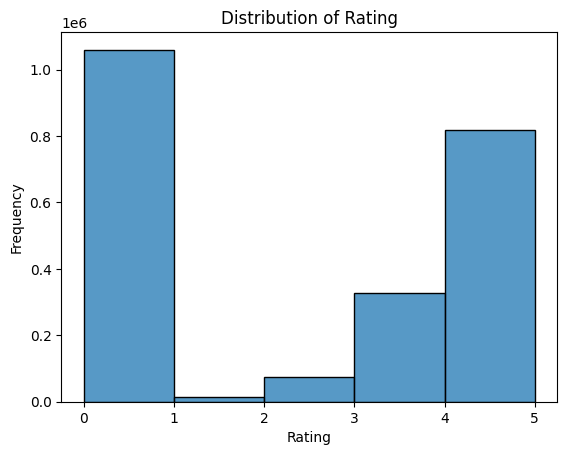

In [35]:
# Plotting histogram for rating column

g=sns.histplot(df.rating, bins=5)
g.set_xlabel('Rating')
g.set_ylabel('Frequency')
plt.title('Distribution of Rating')
plt.show()

* Observation: From the above plot, we can see that most people doesn't give ratings, also, peole tend to give rating 4+ the most.

In [36]:
# df.rating_count.value_counts()

# The output consumes much space, so commenting the code. To execute the above code, just remove '#' sign and press enter.

* Observation: The data of rating_count column can be utilized more effectively if we categorize the rating_count into few useful categories.
* Lets make a new column 'rating_type', and categorize rating_count into 4 categories, and criteria is:
    * if rating_count = 0: 'No Rating Provided'
    * If rating_count > 0 but < 10,000: 'Less than 10k'
    * If rating_count > 10,000 but < 500,000: 'Between 10k and 500k'
    * If rating_count > 500,000: 'More than 500k'

In [37]:
# Making a new column as per above mentioned criteria
df['rating_type'] = 'No Rating Provided'
df.rating_type.loc[(df.rating_count > 0) & (df.rating_count < 10000)] = 'Less than 10k'
df.rating_type.loc[(df.rating_count > 10000) & (df.rating_count < 500000)] = 'Between 10k and 500k'
df.rating_type.loc[df.rating_count > 500000] = 'More than 500k'

df.rating_type.value_counts()

rating_type
Less than 10k           1192842
No Rating Provided      1082328
Between 10k and 500k      35779
More than 500k             1665
Name: count, dtype: int64

## Exploring Categorical Columns

### Free Column

In [38]:
# Converting bool datatype of Free column into object datatype i.e., Where Free is True, replacing that with free, otherwise will paid.

df.free=np.where(df.free==True, 'Free', 'Paid')
df.free.unique()

array(['Free', 'Paid'], dtype=object)

### Content Rating Column

In [39]:
# Viewing unique values from content rating column
df.content_rating.unique()

array(['Everyone', 'Teen', 'Mature 17+', 'Everyone 10+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [40]:
# Printing value_counts for content rating column i.e., checking which value occurs how many times?
df.content_rating.value_counts()

content_rating
Everyone           2021850
Teen                196314
Mature 17+           60279
Everyone 10+         33881
Unrated                154
Adults only 18+        136
Name: count, dtype: int64

* Observation:
    * In the content rating column, we've 6 categories, namely Everyone, Teen, Mature 17+, Everyone 10+, Unrated, and Adults only 18+.
* Lets make 3 simpler categories from those 6 categories for better understanding:
    * Mature 17+ to Adults
    * Adults only 18+ to Adults
    * Everyone 10+ to Teen
    * Unrated to Everyone

In [41]:
# Making 3 categories out of 6 categories as per above criteria.
df.content_rating = df.content_rating.replace('Mature 17+', 'Adults')
df.content_rating = df.content_rating.replace('Adults only 18+', 'Adults')
df.content_rating = df.content_rating.replace('Everyone 10+', 'Teen')
df.content_rating = df.content_rating.replace('Unrated', 'Everyone')

# Checking the excution of our code
df.content_rating.unique()

array(['Everyone', 'Teen', 'Adults'], dtype=object)

## Questions & Answers

* What are the top 10 Categories based upon number of available apps?
* Which are the top 10 Categories that are getting installed the most?
* Are Top 10 catergories by apps also top 10 catergories by installs? (In other words, For Top 10 categories, does having max apps translate into max installs?)
* Which category has the highest Paid and Free Apps?
* How does the size of the Application impacts the installation?
* What are the Top 5 Paid Apps based with highest ratings and installs?
* What are teh Top 5 Free Apps based with highest ratings and installs?

### What are the top 10 Categories based upon number of available apps?

In [42]:
# Viewing the unique categories
df.category.unique()

array(['Adventure', 'Tools', 'Productivity', 'Communication', 'Social',
       'Libraries & Demo', 'Lifestyle', 'Personalization', 'Racing',
       'Maps & Navigation', 'Travel & Local', 'Food & Drink',
       'Books & Reference', 'Medical', 'Puzzle', 'Entertainment',
       'Arcade', 'Auto & Vehicles', 'Photography', 'Health & Fitness',
       'Education', 'Shopping', 'Board', 'Music & Audio', 'Sports',
       'Beauty', 'Business', 'Educational', 'Finance', 'News & Magazines',
       'Casual', 'Art & Design', 'House & Home', 'Card', 'Events',
       'Trivia', 'Weather', 'Strategy', 'Word', 'Video Players & Editors',
       'Action', 'Simulation', 'Music', 'Dating', 'Role Playing',
       'Casino', 'Comics', 'Parenting'], dtype=object)

In [43]:
# Creating and viewing the variable containing top 10 categories having the most available apps
top_10_categories_by_apps= df.category.value_counts().nlargest(10).reset_index().rename({'count':'count_of_apps'}, axis=1)
top_10_categories_by_apps

,category,count_of_apps
0,Education,241074
1,Music & Audio,154898
2,Tools,143972
3,Business,143758
4,Entertainment,138266
5,Lifestyle,118322
6,Books & Reference,116726
7,Personalization,89209
8,Health & Fitness,83499
9,Productivity,79685


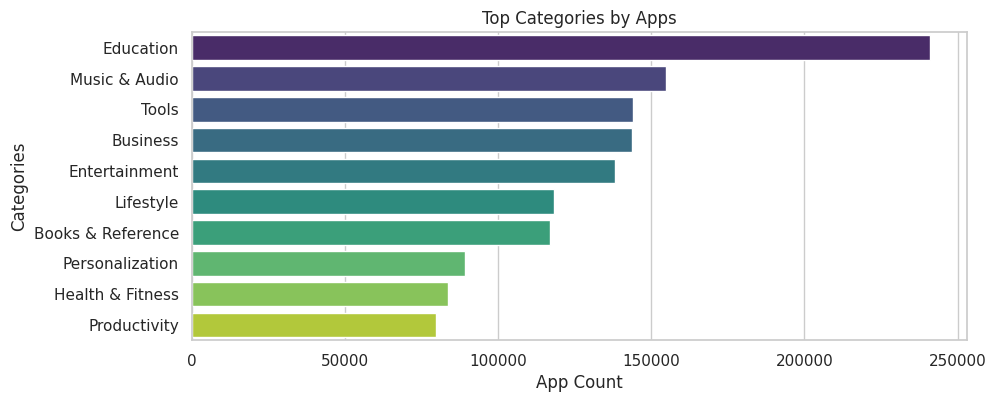

In [44]:
# Plotting the above findings

# Some customization
sns.set_style("whitegrid") # The background of figure
sns.set_context("notebook") # Can be choose from 'paper', 'notebook', 'talk', 'poster'

# Code for plot
plt.figure(figsize=(10, 4))  # Set the figure size
sns.barplot(x='count_of_apps', y='category', data=top_10_categories_by_apps, palette='viridis')
plt.title('Top Categories by Apps')
plt.xlabel('App Count')
plt.ylabel('Categories')
plt.show()

### Which are the top 10 Categories that are getting installed the most?

In [45]:
# Viewing the unique values
df.category.unique()

array(['Adventure', 'Tools', 'Productivity', 'Communication', 'Social',
       'Libraries & Demo', 'Lifestyle', 'Personalization', 'Racing',
       'Maps & Navigation', 'Travel & Local', 'Food & Drink',
       'Books & Reference', 'Medical', 'Puzzle', 'Entertainment',
       'Arcade', 'Auto & Vehicles', 'Photography', 'Health & Fitness',
       'Education', 'Shopping', 'Board', 'Music & Audio', 'Sports',
       'Beauty', 'Business', 'Educational', 'Finance', 'News & Magazines',
       'Casual', 'Art & Design', 'House & Home', 'Card', 'Events',
       'Trivia', 'Weather', 'Strategy', 'Word', 'Video Players & Editors',
       'Action', 'Simulation', 'Music', 'Dating', 'Role Playing',
       'Casino', 'Comics', 'Parenting'], dtype=object)

In [46]:
# Creating and viewing the variable containing top 10 categories that are installed the most.

top_10_categories_by_installs= df.groupby('category')['installs'].sum().nlargest(10).reset_index().rename({'installs':'count_of_installs'}, axis=1)
top_10_categories_by_installs

,category,count_of_installs
0,Tools,71440321217
1,Communication,43216592514
2,Productivity,28314042263
3,Photography,18998958963
4,Video Players & Editors,18591154109
5,Action,17399855328
6,Social,17165994665
7,Entertainment,17108504983
8,Casual,16836853725
9,Arcade,14501231905


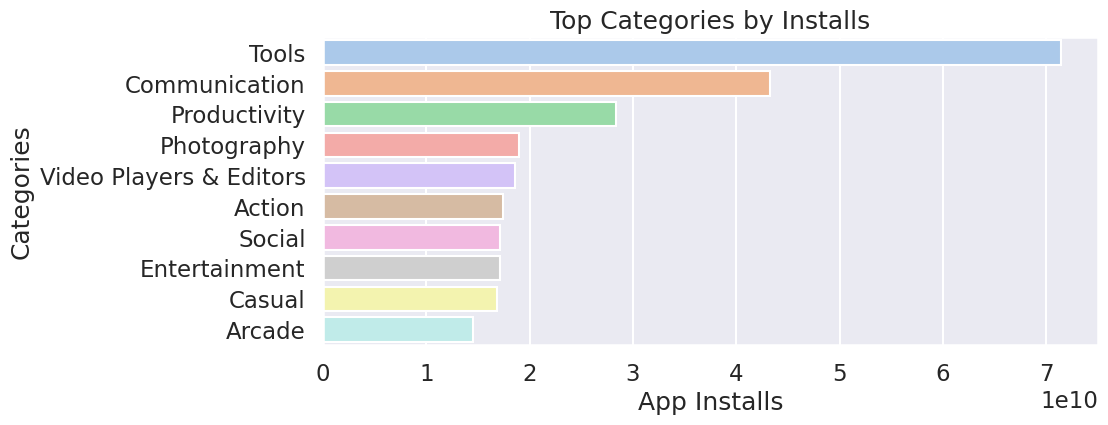

In [47]:
# Plotting the above findings

# Some customizations for the plot
sns.set_style("darkgrid") # The background of figure
sns.set_context("talk") # Can be choose from 'paper', 'notebook', 'talk', 'poster'

# Code for plot
plt.figure(figsize=(10, 4))  # Set the figure size
sns.barplot(x='count_of_installs', y='category', data=top_10_categories_by_installs, palette='pastel')
plt.title('Top Categories by Installs')
plt.xlabel('App Installs')
plt.ylabel('Categories')
plt.show()

### Are Top 10 catergories by apps also top 10 catergories by installs? (In other words, For Top 10 categories, does having max apps translate into max installs?)

In [48]:
# Mering the above 2 datasets, showing only those rows which are in both above df's/variables.
top_category=pd.merge(top_10_categories_by_apps, top_10_categories_by_installs, on='category', how='inner')
top_category

,category,count_of_apps,count_of_installs
0,Tools,143972,71440321217
1,Entertainment,138266,17108504983
2,Productivity,79685,28314042263


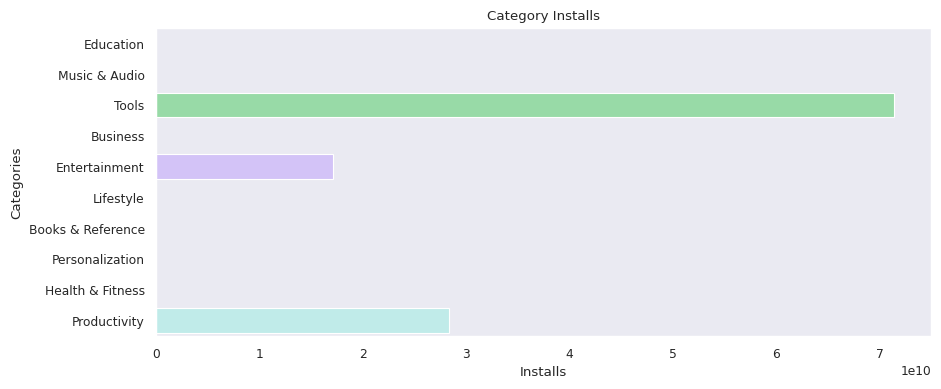

In [49]:
# Plotting the graph for audiance

# Some customization
sns.set_style("dark") # The background of figure
sns.set_context("paper") # Can be choose from 'paper', 'notebook', 'talk', 'poster'

# Code for plot
plt.figure(figsize=(10, 4))  # Set the figure size
sns.barplot(x='count_of_installs', y='category', data=top_10_categories_by_installs, palette='pastel', order=top_10_categories_by_apps.category)
plt.title('Category Installs')
plt.xlabel('Installs')
plt.ylabel('Categories')
plt.show()

* No, there are only 3 categories (Tools, Productivity, and Entertainment) out of 10, which fall in both top 10 categories by apps and top 10 categories by installs. This means that having maximum number of apps doesn't translate into maximum installs.

### New Heading: